#### This file shows the organized thoughtful flow of logic that leads to our model conlsuion

In [39]:
library("leaps")
library("car")
library("lmtest")

In [40]:
all.data <- as.matrix(read.csv("WHR.csv"), header = TRUE)

# Get the number of rows in the data frame
n_rows <- nrow(all.data)

# Generate random indices for half of the data
indices <- sample(1:n_rows, size = n_rows / 2)

# Split the data into two halves based on the random indices
train <- all.data[indices, ]
test <- all.data[-indices, ]

In [41]:
country <- train[,1]
happiness <- as.numeric(train[,2])    # y
GDP <- as.numeric(train[,3])
soc.supp <- as.numeric(train[,4])
life.exp <- as.numeric(train[,5])
freedom <- as.numeric(train[,6])
generosity <- as.numeric(train[,7])
corruption <- as.numeric(train[,8])

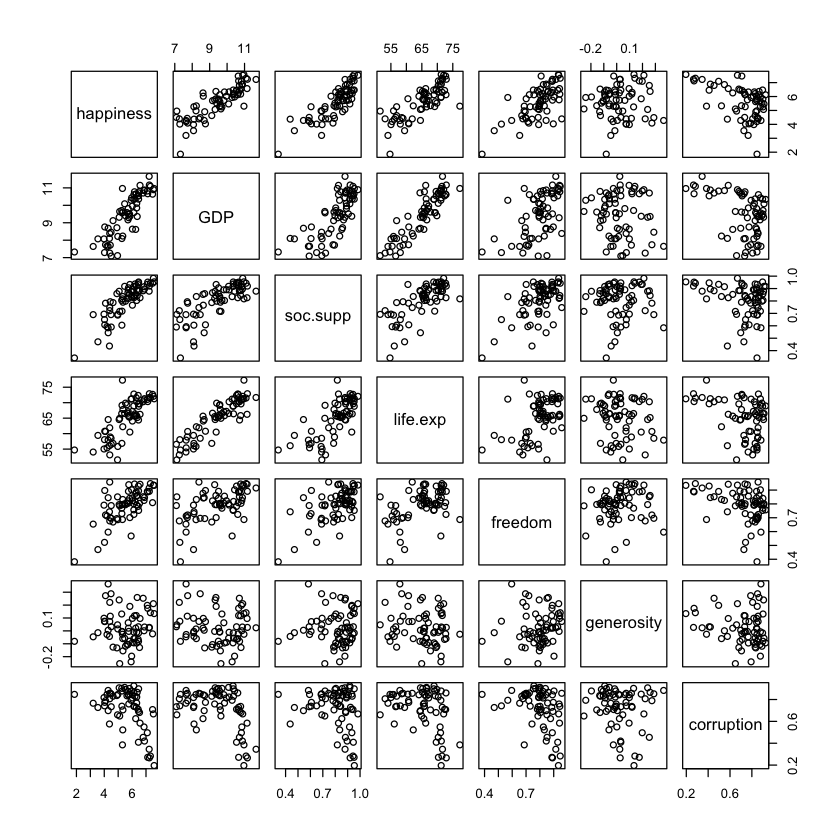

In [42]:
pairs(~happiness+GDP+soc.supp+life.exp+freedom+generosity+corruption)

##### From these plots we can see that GDP, Social Support, and life expectancy are highly correlated with eachother and world happiness, Generosity seems to be have no correlation. Corruption seems to be negatively correlated with happiness which makes sense.  

##### It is important to note that the GDP data has had a logarithm trnasformation applied to it which makes sense becasue ________

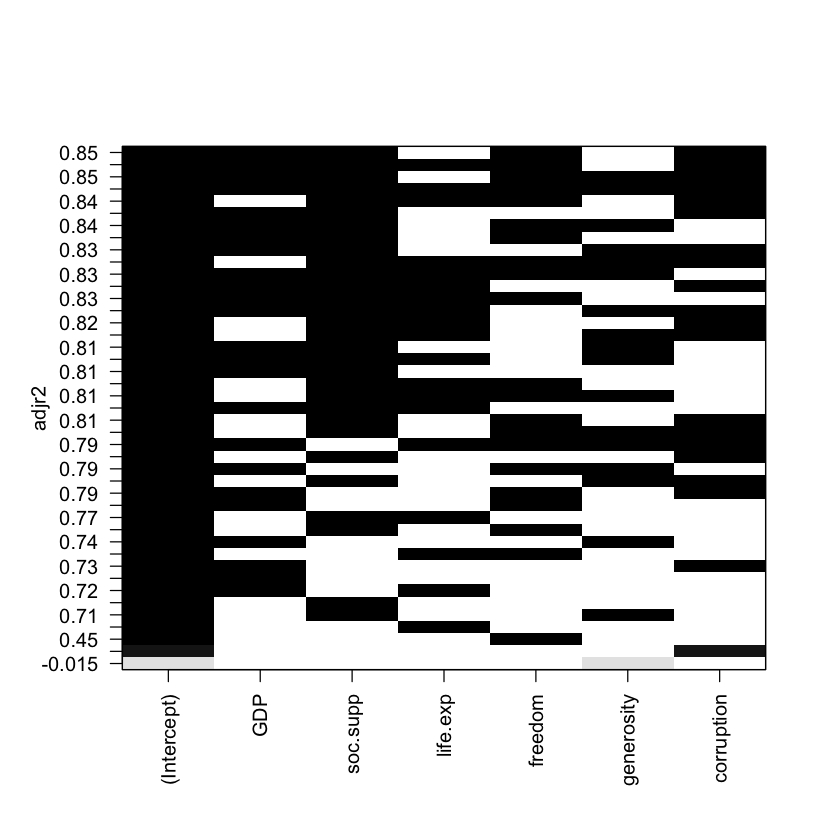

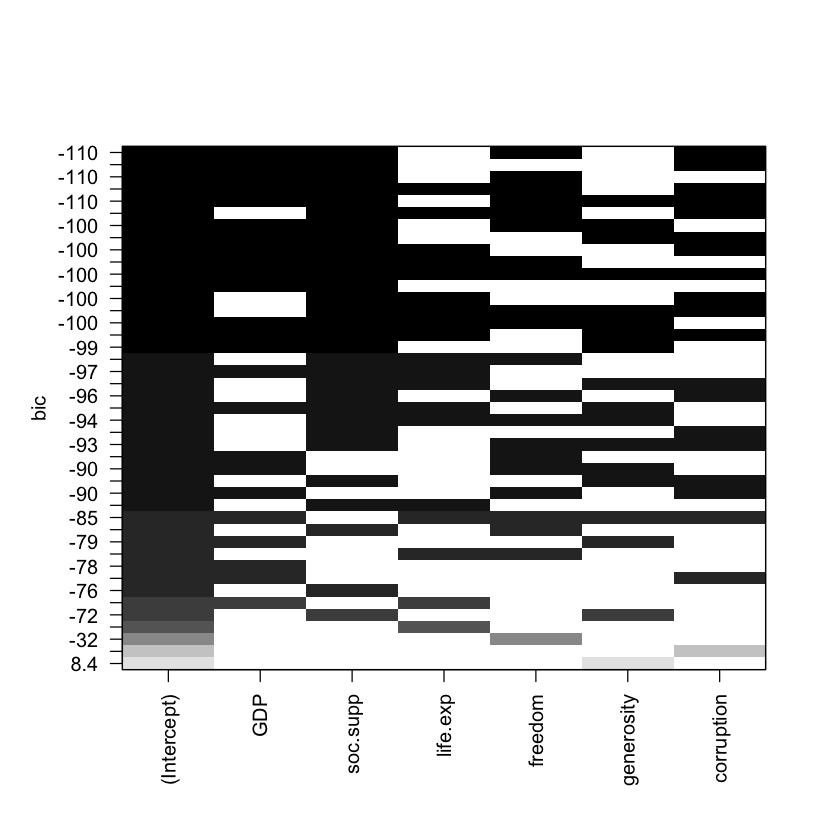

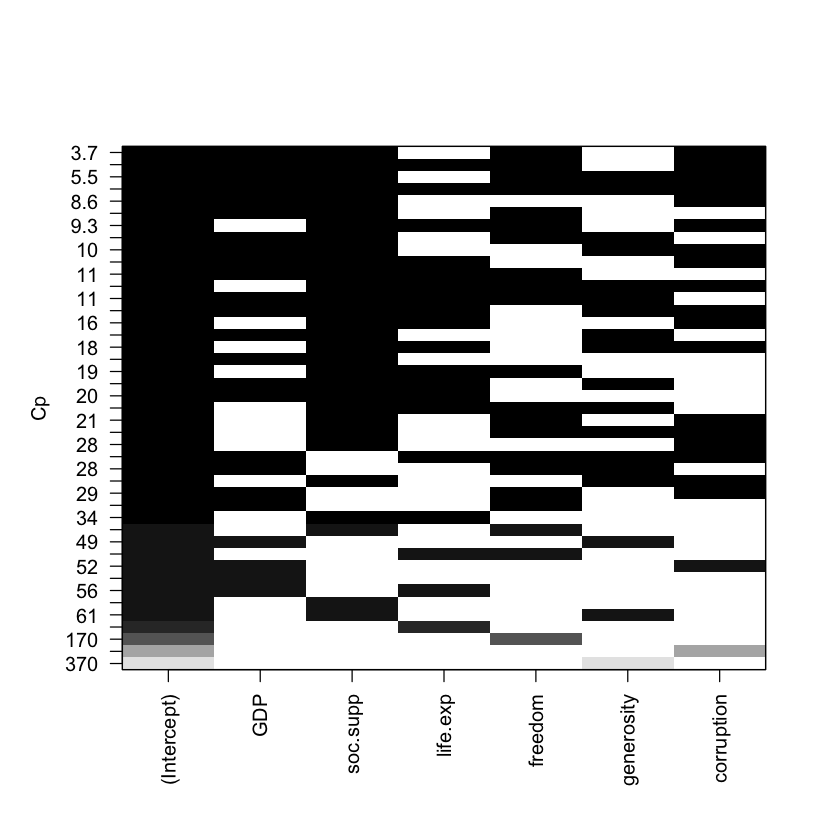

In [43]:
collection <- regsubsets(happiness ~ GDP+soc.supp+life.exp+freedom+generosity+corruption, data = data.frame(all.data),nbest=10)
plot(collection, scale="adjr2")
plot(collection, scale="bic")
plot(collection, scale="Cp")

##### Here we have used the regsubset function displays to show us different models that will yield the highest adjusted r^2 values and the lowest bic values. The reuslts show us the best models contain GDP social support freedom and corruption. Life expectancy is highly correlated with GDP and Social Support and is thus redundant and can be removed. These results are inline with the interpretation from our scatterplot matrix above.

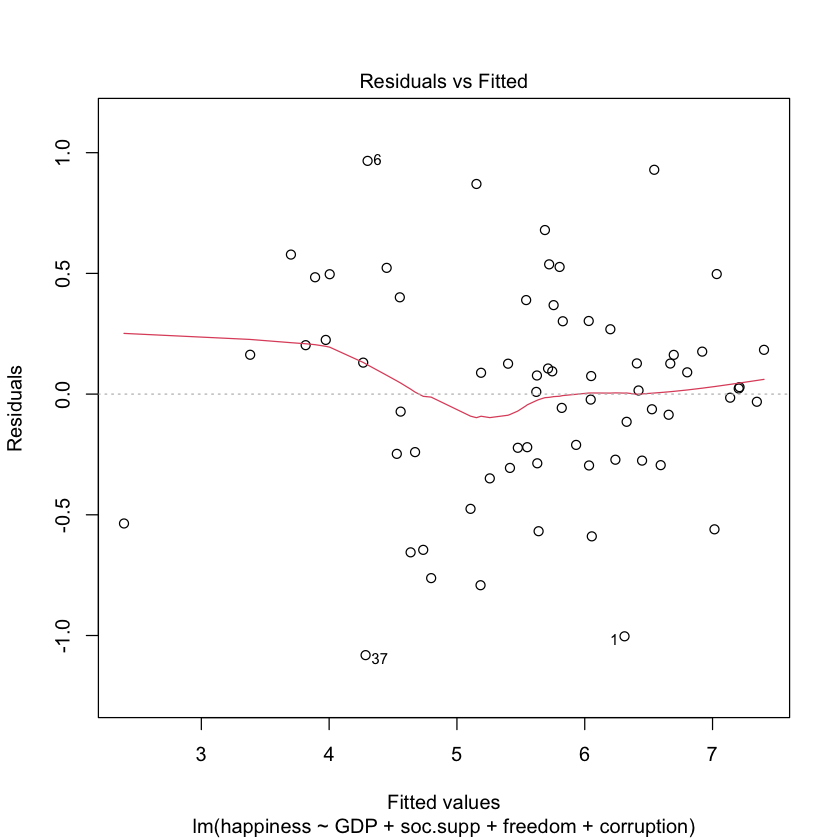

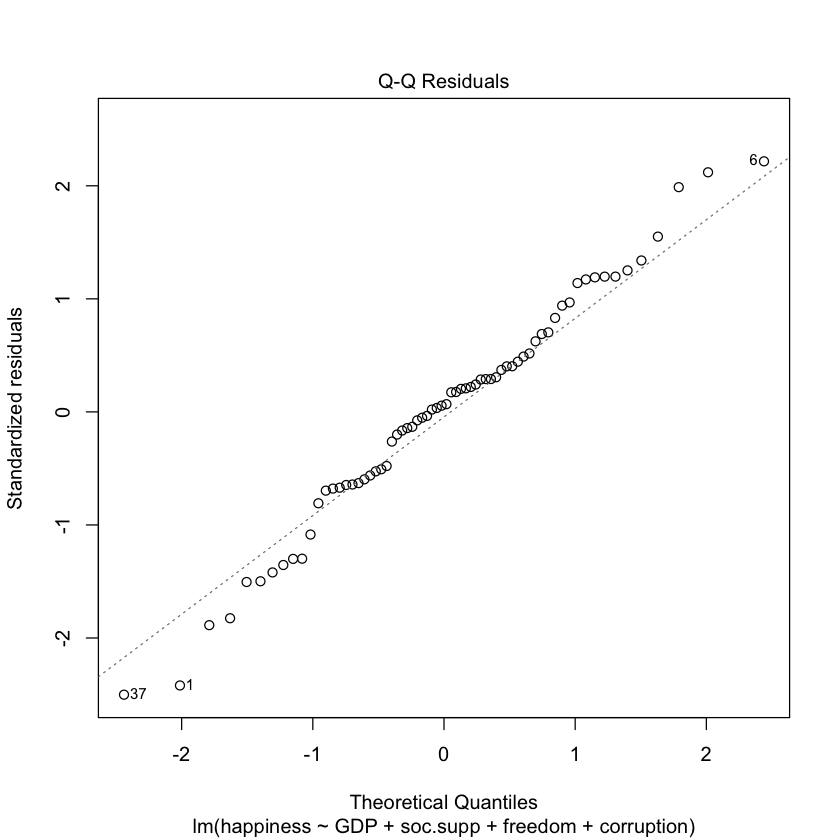

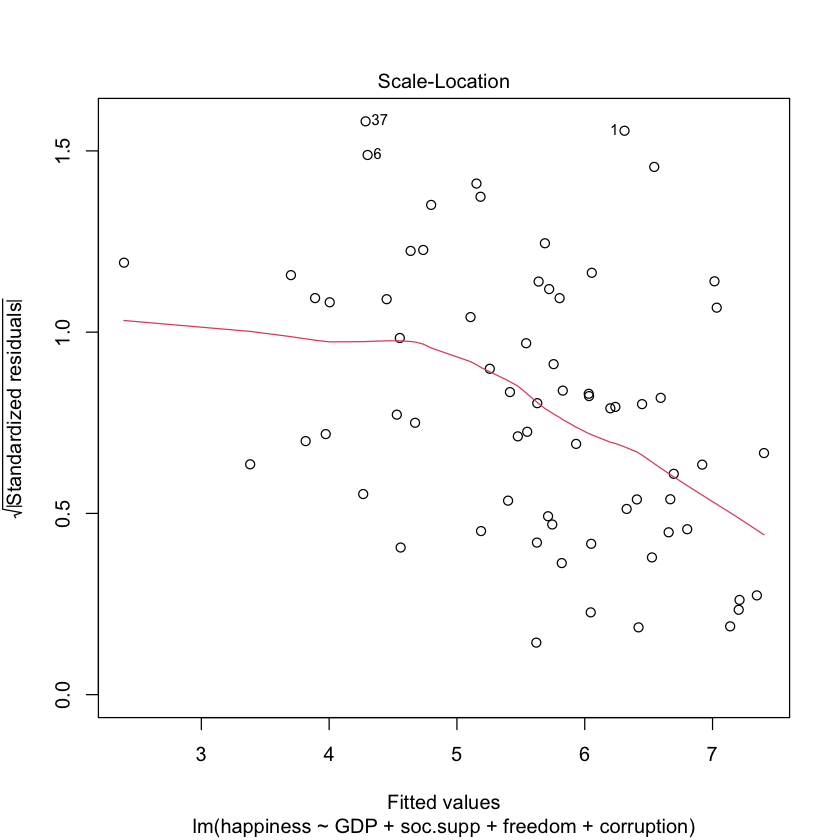

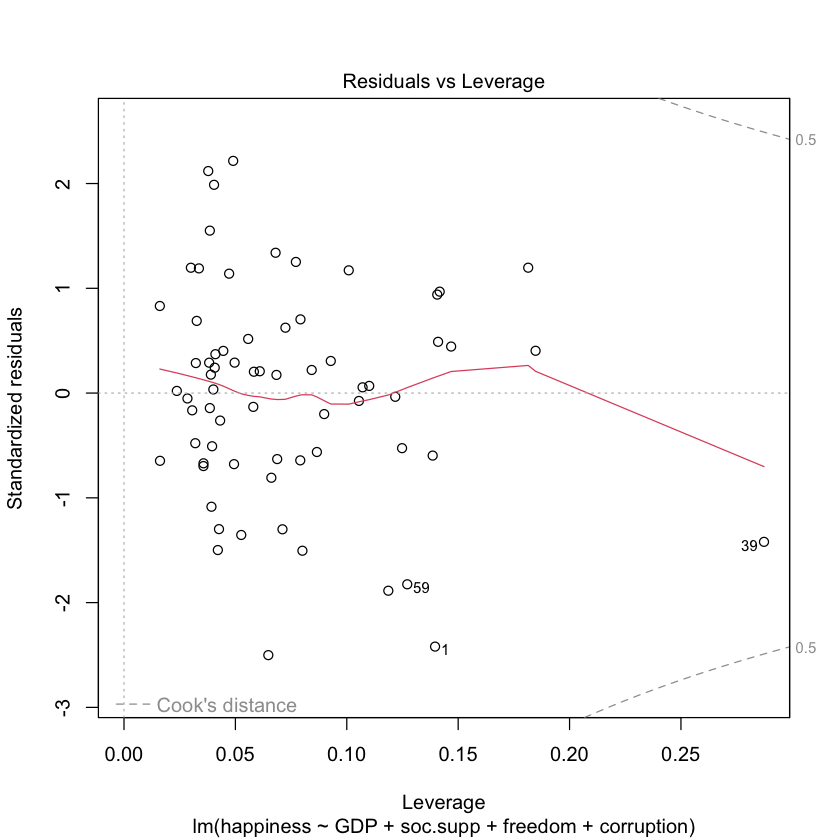

In [44]:
model <- lm(happiness~GDP+soc.supp+freedom+corruption)
res <- residuals(model) 
plot(model)

##### The residual vs fitted values plot shows a high number of big negative residuals. The residuals are highly skewed to the left. This does not align with our assumption of the errors being independnt and identeically distributed on a normal distribution with mean 0. 

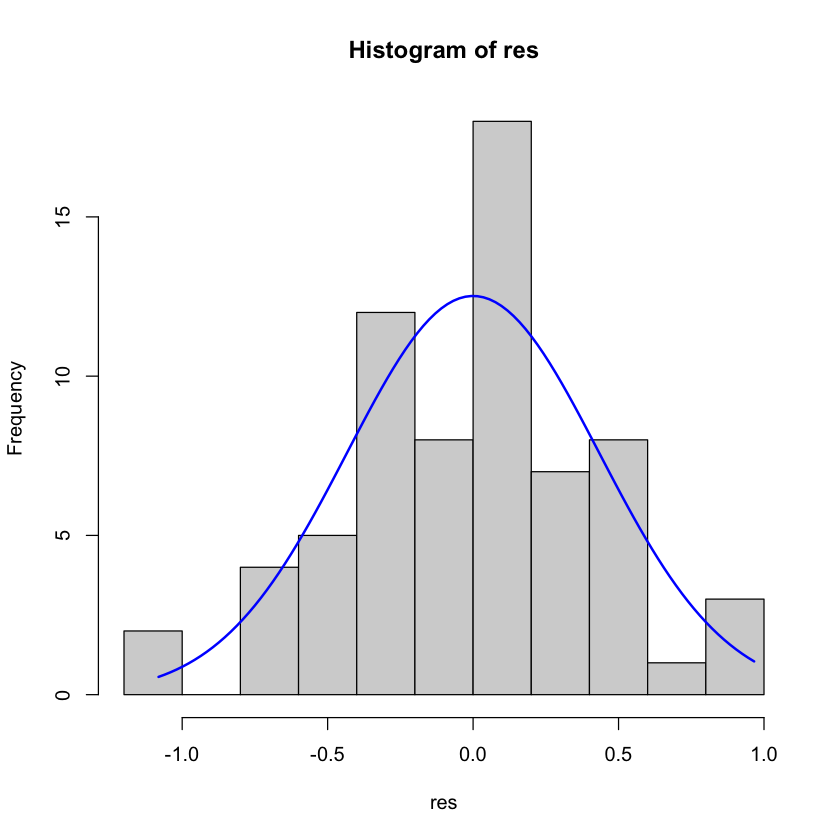

In [45]:
hist(res)

# Add a normal distribution curve
mu <- mean(res)
sigma <- sd(res)
x <- seq(min(res), max(res), length = 100)
y <- dnorm(x, mean = mu, sd = sigma) * length(res) * diff(hist(res)$breaks[1:2])
lines(x, y, col = "blue", lwd = 2)

##### This histogram shows the left skew mention above does go against or normailty assumption

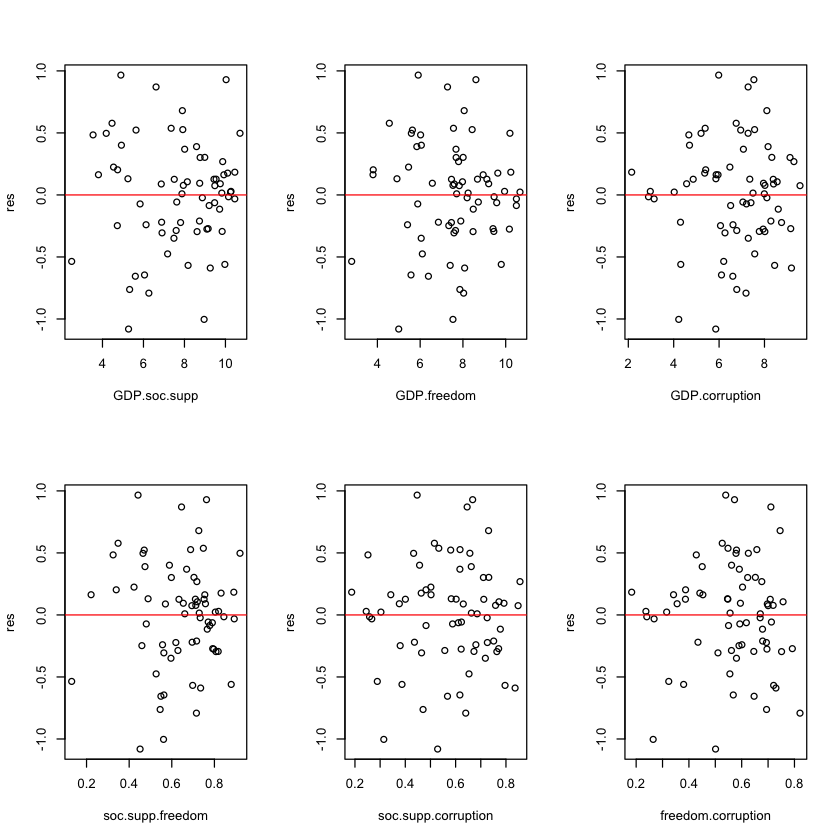

In [46]:
GDP.soc.supp<-GDP*soc.supp
GDP.freedom<-GDP*freedom
GDP.corruption<-GDP*corruption
soc.supp.freedom<-soc.supp*freedom
soc.supp.corruption<-soc.supp*corruption
freedom.corruption<-freedom*corruption
par(mfrow=c(2,3))
plot(GDP.soc.supp,res)
abline(h = 0, col = "red")
plot(GDP.freedom,res)
abline(h = 0, col = "red")
plot(GDP.corruption,res)
abline(h = 0, col = "red")
plot(soc.supp.freedom,res)
abline(h = 0, col = "red")
plot(soc.supp.corruption,res)
abline(h = 0, col = "red")
plot(freedom.corruption,res)
abline(h = 0, col = "red")

In [47]:
vif(model)

GDP   soc.supp    freedom corruption 
  2.886451   2.793853   1.681229   1.365379

In [48]:
shapiro.test(res)


	Shapiro-Wilk normality test

data:  res
W = 0.98681, p-value = 0.6926


since the p-value is less than 0.05 we reject the null hypothesis and claim that the errors are not normally distributed

In [49]:
bptest(model)


	studentized Breusch-Pagan test

data:  model
BP = 5.2651, df = 4, p-value = 0.2612


In [50]:
#true difference of means is not 0

In [67]:
corruption2 <- 1/sqrt(corruption)

In [69]:
model2 <- lm(happiness~GDP+soc.supp+freedom+corruption2)
res2 <- residuals(model2) 
summary(model2)


Call:
lm(formula = happiness ~ GDP + soc.supp + freedom + corruption2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05064 -0.26711  0.01118  0.25605  0.98070 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.76046    0.46947  -5.880 1.70e-07 ***
GDP          0.36190    0.07468   4.846 8.56e-06 ***
soc.supp     3.36005    0.66599   5.045 4.11e-06 ***
freedom      1.83918    0.61929   2.970  0.00421 ** 
corruption2  0.63763    0.26067   2.446  0.01724 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4518 on 63 degrees of freedom
Multiple R-squared:  0.8557,	Adjusted R-squared:  0.8466 
F-statistic: 93.41 on 4 and 63 DF,  p-value: < 2.2e-16


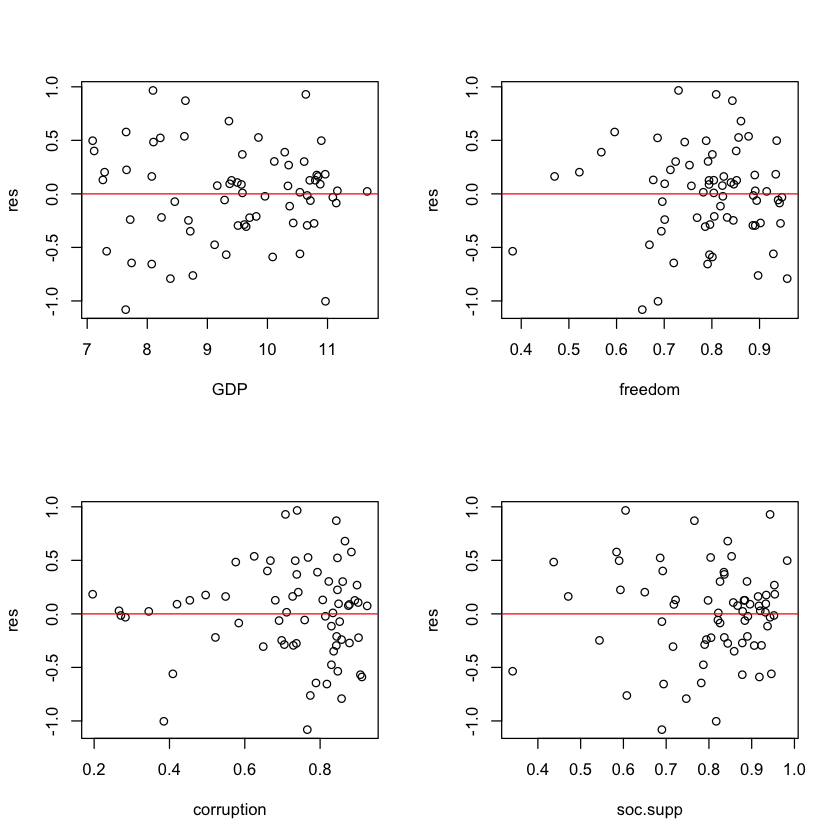

In [70]:
par(mfrow=c(2,2))
plot(GDP,res)
abline(h = 0, col = "red")
plot(freedom,res)
abline(h = 0, col = "red")
plot(corruption,res)
abline(h = 0, col = "red")
plot(soc.supp,res)
abline(h = 0, col = "red")

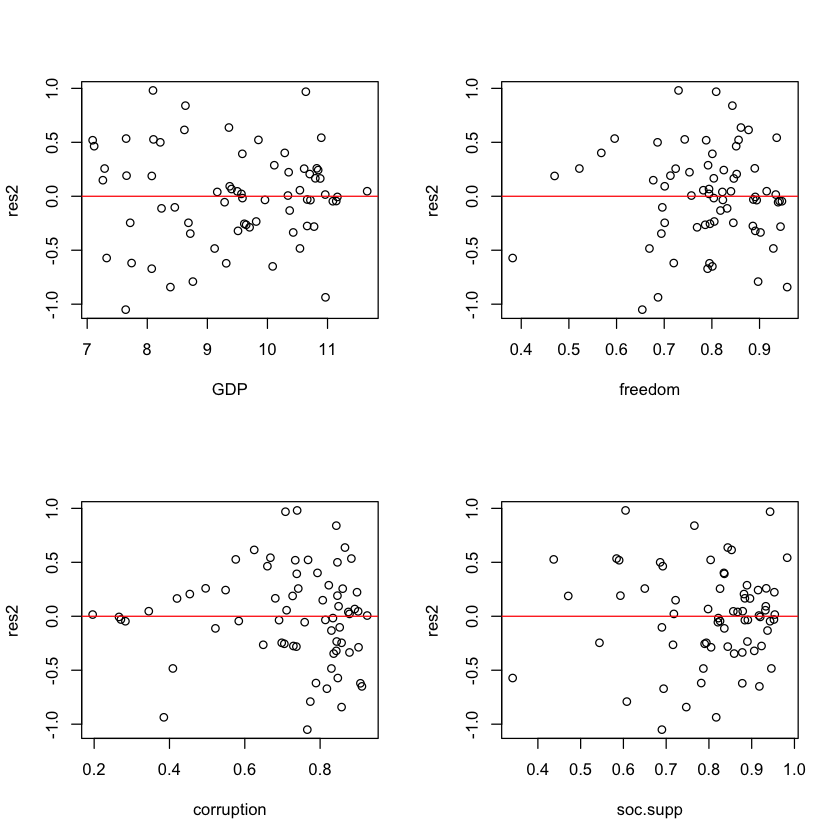

In [71]:
par(mfrow=c(2,2))
plot(GDP,res2)
abline(h = 0, col = "red")
plot(freedom,res2)
abline(h = 0, col = "red")
plot(corruption,res2)
abline(h = 0, col = "red")
plot(soc.supp,res2)
abline(h = 0, col = "red")